> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Analysis of medical appointments(in Brazil)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

**No-Show appointments**
> Data set consists of data of medical appointments in Brazil, is focused on the question whether ppl turn up for appointment or not.
>Characteristics of the data set
<ol>
    <li>Neighbourhood-gives location</li>
    <li>Gender</li>
    <li>Age</li>
    <li>Scholarship</li>
    <li>No-show-This shows whether appointment taken or not if value is No, then appointment taken and vice-versa</li>
    </ol>

### Posing Questions
<ol>
    <li>Based on neighbourhood, observing ppl appointments with respect to scholarship?</li>
    <li>Male vs Female scholarship and its effect on appointment</li>
    <li>Which age ppl are not taking appointments mostly?</li>
    <li>Ppl with hipertension,diabetes appointment vs Ppl without hipertension,diabetes appointment</li>
    </ol>
    

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
%matplotlib notebook

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

#reading the data into a dataframe using pd.read_csv('filepath/name')
data=pd.read_csv('noshowappointments-kagglev2-may-2016.csv') 
#checking whether data read correclty or not and data.head() returns first five rows here we used it since dataset is big 
print(data.head())                                          


      PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0        0      

In [3]:
#convert the dataframe data into a data frame that allows access using a unique value
#this allows to remove duplicates in the data frame
df=data.set_index('PatientId')
print(df.head())

              AppointmentID Gender          ScheduledDay  \
PatientId                                                  
2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

                    AppointmentDay  Age      Neighbourhood  Scholarship  \
PatientId                                                                 
2.987250e+13  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0   
5.589978e+14  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0   
4.262962e+12  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0   
8.679512e+11  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0   
8.841186e+12  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0   

              Hipertension  Diabetes  Alcoholism  Han

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).


In [4]:
df.columns = df.columns.str.replace('No-show','NoShow')
df.columns

Index(['AppointmentID', 'Gender', 'ScheduledDay', 'AppointmentDay', 'Age',
       'Neighbourhood', 'Scholarship', 'Hipertension', 'Diabetes',
       'Alcoholism', 'Handcap', 'SMS_received', 'NoShow'],
      dtype='object')

### Data Cleaning


In [5]:
#getting dataframe with required col's 
#refering to the questions posed above the col's are selected 
df_investigate=df[['Gender','ScheduledDay','Age','Neighbourhood','Scholarship','Hipertension','Diabetes','NoShow']]
print(df_investigate.head())

             Gender          ScheduledDay  Age      Neighbourhood  \
PatientId                                                           
2.987250e+13      F  2016-04-29T18:38:08Z   62    JARDIM DA PENHA   
5.589978e+14      M  2016-04-29T16:08:27Z   56    JARDIM DA PENHA   
4.262962e+12      F  2016-04-29T16:19:04Z   62      MATA DA PRAIA   
8.679512e+11      F  2016-04-29T17:29:31Z    8  PONTAL DE CAMBURI   
8.841186e+12      F  2016-04-29T16:07:23Z   56    JARDIM DA PENHA   

              Scholarship  Hipertension  Diabetes NoShow  
PatientId                                                 
2.987250e+13            0             1         0     No  
5.589978e+14            0             0         0     No  
4.262962e+12            0             0         0     No  
8.679512e+11            0             0         0     No  
8.841186e+12            0             1         1     No  


In [6]:
#knowing the data types of the data in the col's 
print(df_investigate.dtypes)

Gender           object
ScheduledDay     object
Age               int64
Neighbourhood    object
Scholarship       int64
Hipertension      int64
Diabetes          int64
NoShow           object
dtype: object


In [7]:
#after checking the data types of the col's in the data frame to investigate converting them to appropriate data type
#converting data in the ScheduledDay from dtype object to dtype datatime
df_investigate1=df_investigate[df_investigate['ScheduledDay']==pd.to_datetime(df['ScheduledDay'])].copy()
#converting NoShow to a bool dtype if value is No then respective bool type will be True i.e appointment_taken=True
#df_investigate['Scholarship']=df_investigate.NoShow.astype(bool)
#df_investigate['Neighbourhood']=df_investigate.Neighbourhood.astype(str)
df_investigate.head()

Gender          ScheduledDay  Age      Neighbourhood  \
PatientId                                                           
2.987250e+13      F  2016-04-29T18:38:08Z   62    JARDIM DA PENHA   
5.589978e+14      M  2016-04-29T16:08:27Z   56    JARDIM DA PENHA   
4.262962e+12      F  2016-04-29T16:19:04Z   62      MATA DA PRAIA   
8.679512e+11      F  2016-04-29T17:29:31Z    8  PONTAL DE CAMBURI   
8.841186e+12      F  2016-04-29T16:07:23Z   56    JARDIM DA PENHA   

              Scholarship  Hipertension  Diabetes NoShow  
PatientId                                                 
2.987250e+13            0             1         0     No  
5.589978e+14            0             0         0     No  
4.262962e+12            0             0         0     No  
8.679512e+11            0             0         0     No  
8.841186e+12            0             1         1     No

In [8]:
df_investigate.dtypes

Gender           object
ScheduledDay     object
Age               int64
Neighbourhood    object
Scholarship       int64
Hipertension      int64
Diabetes          int64
NoShow           object
dtype: object

In [9]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
#Create a new function:
def num_missing(x):
    return sum(x.isnull())

#Applying per column:
print("Missing values per column:")
print(df_investigate.apply(num_missing, axis=0)) #axis=0 defines that function is to be applied on each column

#Applying per row:
#print ("\nMissing values per row:")
#print (df_investigate.apply(num_missing, axis=1).head())
df_investigate.head()

Missing values per column:
Gender           0
ScheduledDay     0
Age              0
Neighbourhood    0
Scholarship      0
Hipertension     0
Diabetes         0
NoShow           0
dtype: int64


Gender          ScheduledDay  Age      Neighbourhood  \
PatientId                                                           
2.987250e+13      F  2016-04-29T18:38:08Z   62    JARDIM DA PENHA   
5.589978e+14      M  2016-04-29T16:08:27Z   56    JARDIM DA PENHA   
4.262962e+12      F  2016-04-29T16:19:04Z   62      MATA DA PRAIA   
8.679512e+11      F  2016-04-29T17:29:31Z    8  PONTAL DE CAMBURI   
8.841186e+12      F  2016-04-29T16:07:23Z   56    JARDIM DA PENHA   

              Scholarship  Hipertension  Diabetes NoShow  
PatientId                                                 
2.987250e+13            0             1         0     No  
5.589978e+14            0             0         0     No  
4.262962e+12            0             0         0     No  
8.679512e+11            0             0         0     No  
8.841186e+12            0             1         1     No

>from the above finding no missing values hence imputing missing values is not necessary

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Based on Neighbourhood and Scholarship ,how appointment is affected ? 
>**Parameters** 
<ol>
    <li>Neighbourhood - Independent variable</li>
    <li>Scholarship - Independent variable</li>
    <li>Appointment(NoShow)-dependent variable on above variables</li>

In [10]:
# Use this, and more code cells, to explore your data. Don't forget to add
# Markdown cells to document your observations and findings.
df_show=df_investigate[['Neighbourhood','Scholarship','NoShow']] #getting dataframe with required features
print(df_show.head()) 

                  Neighbourhood  Scholarship NoShow
PatientId                                          
2.987250e+13    JARDIM DA PENHA            0     No
5.589978e+14    JARDIM DA PENHA            0     No
4.262962e+12      MATA DA PRAIA            0     No
8.679512e+11  PONTAL DE CAMBURI            0     No
8.841186e+12    JARDIM DA PENHA            0     No


<IPython.core.display.Javascript object>


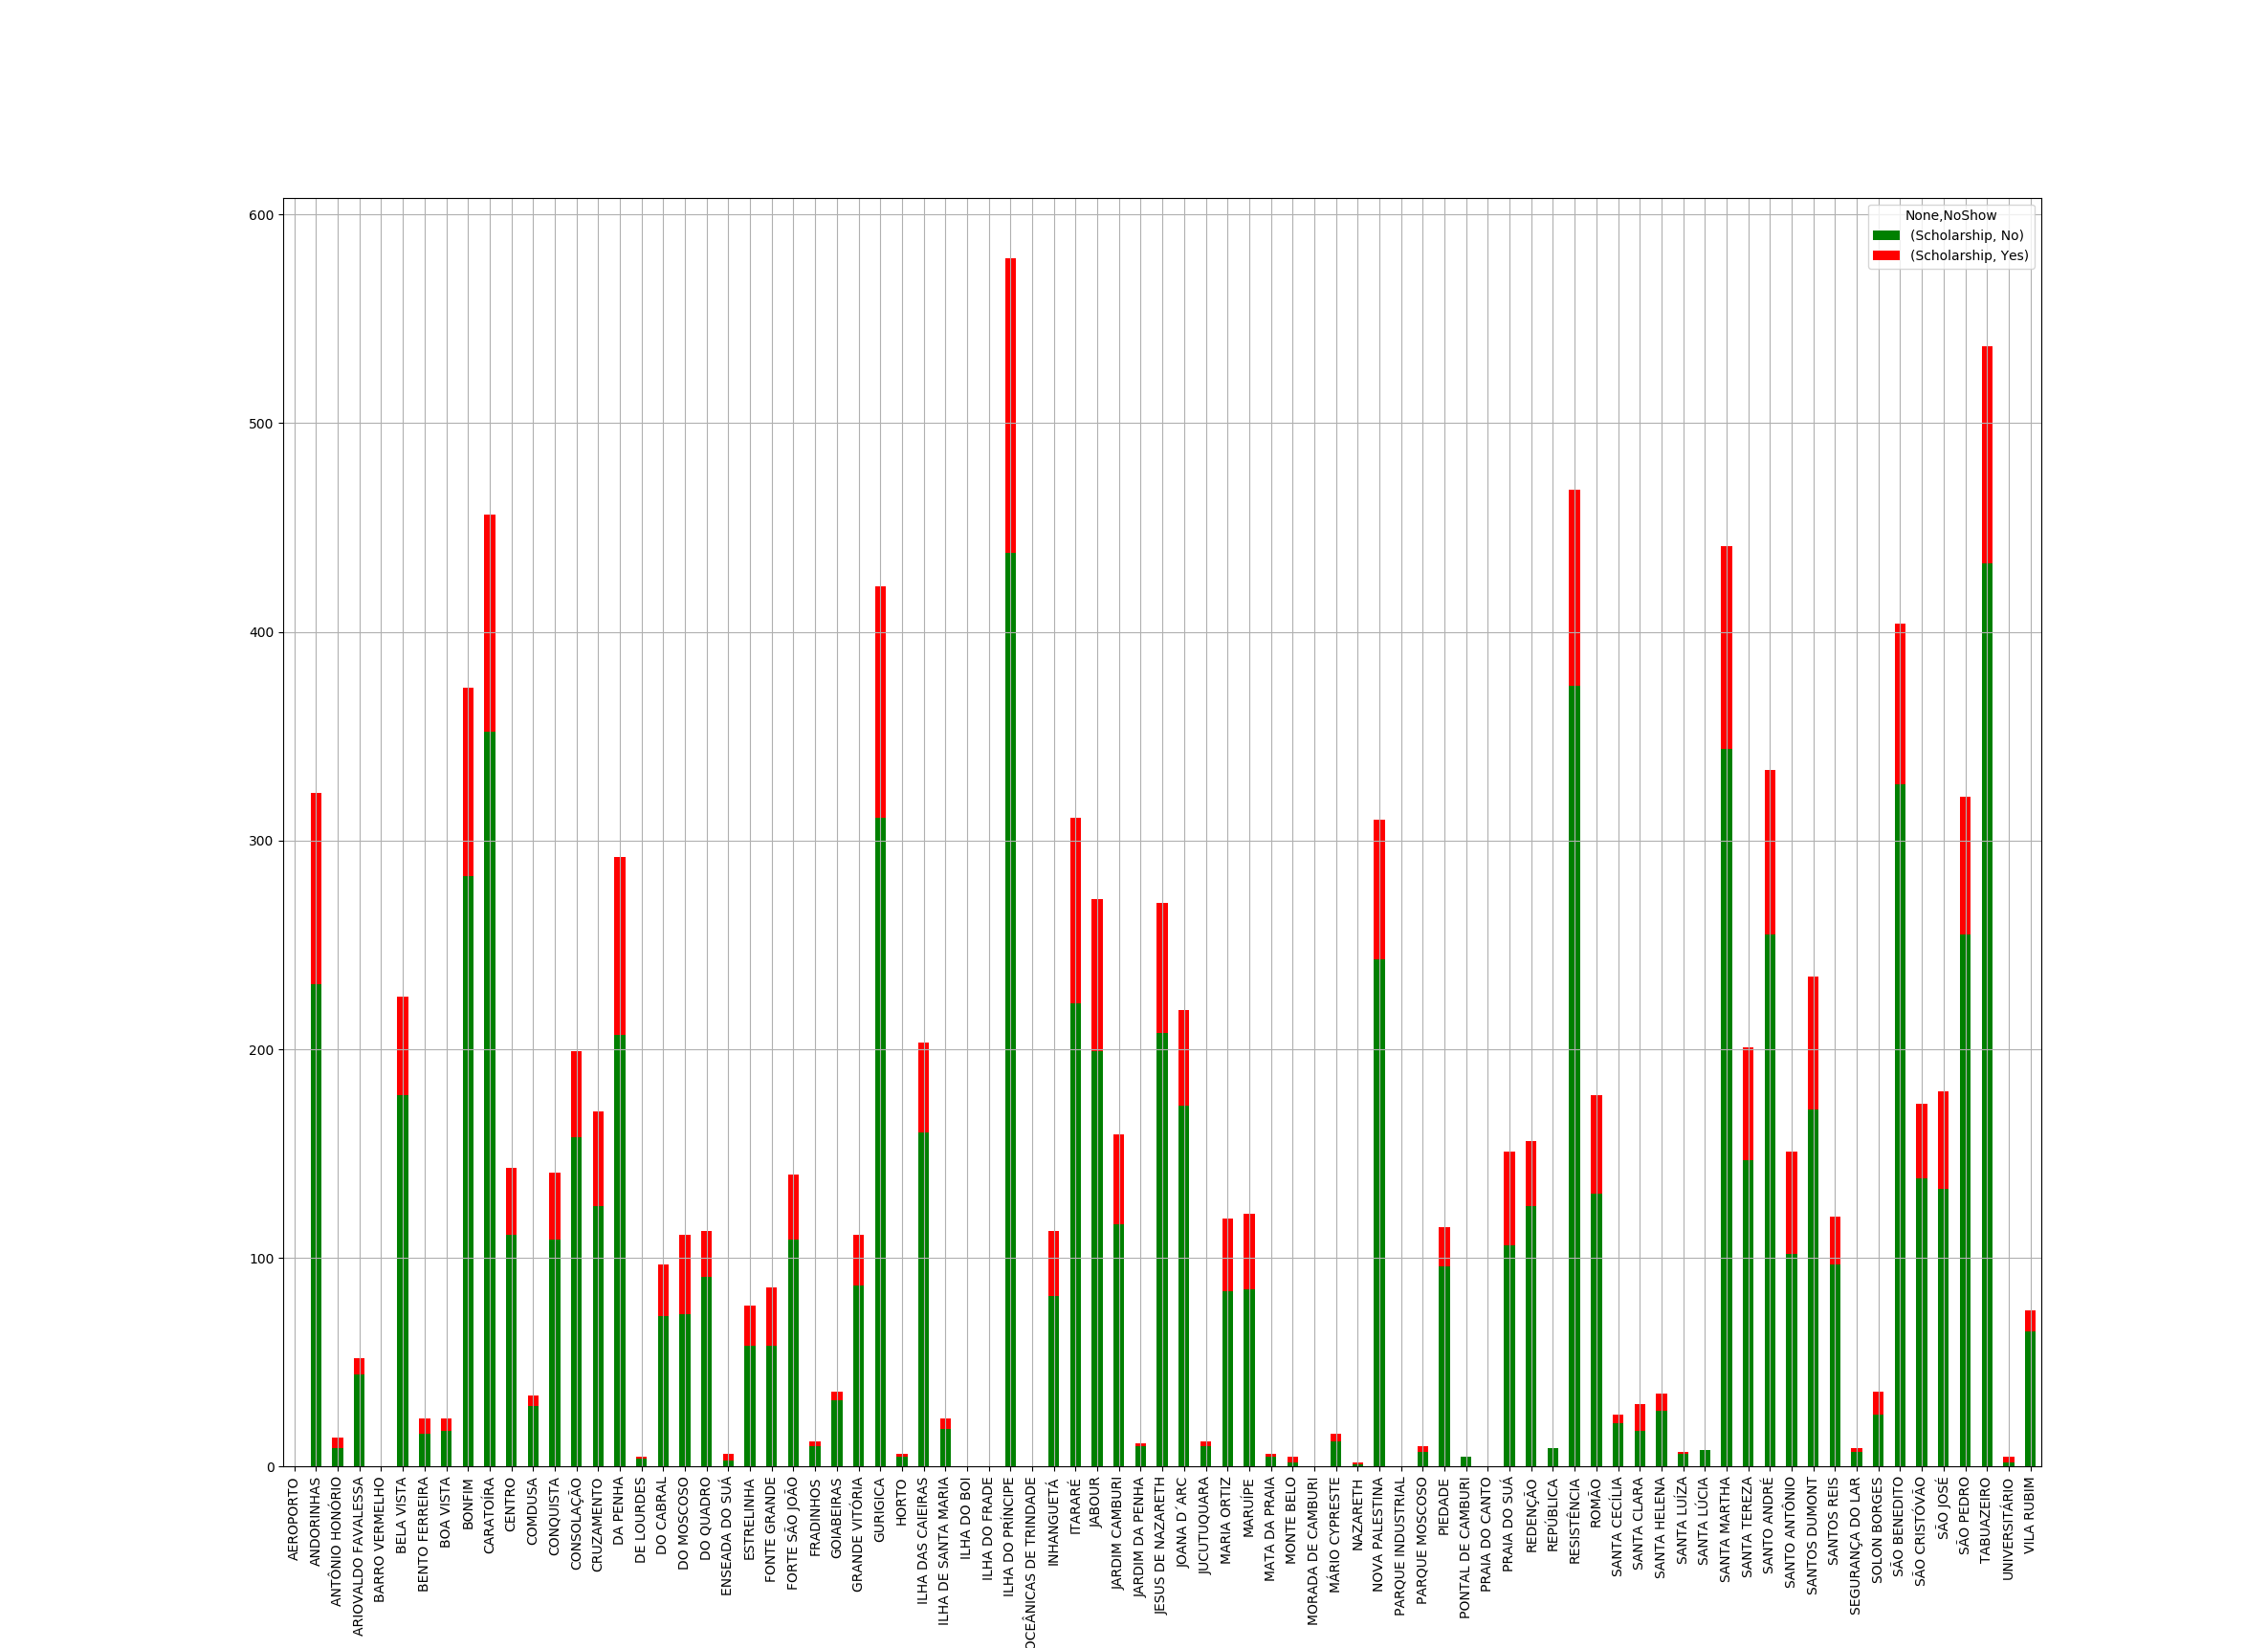

In [29]:
#using groupby creating a groupby object for dataframe chosen
var = df_show.groupby(['Neighbourhood','NoShow']).sum() 
#here we are using sum in order to know how many ppl show up for their appointment 
var.unstack().plot(kind='bar',stacked=True,  color=['green','red'], grid=True)
#using above groupby object stacked col plot plotted 
#green-->(scholarship,No)
#red-->(Scholarship,Yes)

In [30]:
var1 = df_show.groupby(['Neighbourhood','NoShow'],as_index=False).sum() 
var1.head()

Neighbourhood NoShow  Scholarship
0        AEROPORTO     No            0
1        AEROPORTO    Yes            0
2       ANDORINHAS     No          231
3       ANDORINHAS    Yes           92
4  ANTÔNIO HONÓRIO     No            9

<IPython.core.display.Javascript object>


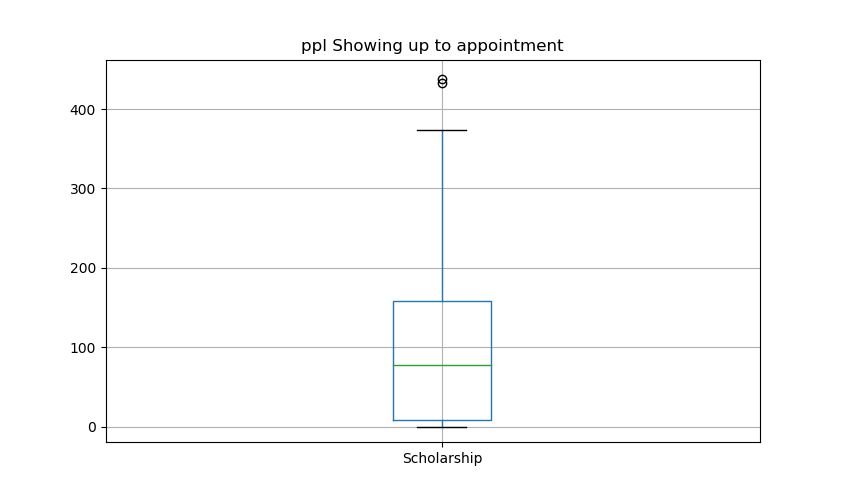

Scholarship
count    80.000000
mean    103.537500
std     113.014387
min       0.000000
25%       9.000000
50%      77.500000
75%     158.500000
max     438.000000

In [15]:
#using boxplot showing the ppl show up for  appointment
var2=var1[var1['NoShow']=='No']
plt.title('ppl Showing up to appointment')
var2.boxplot(column='Scholarship')
var2.describe()#getting the stats of ppl attended appointment 

<IPython.core.display.Javascript object>


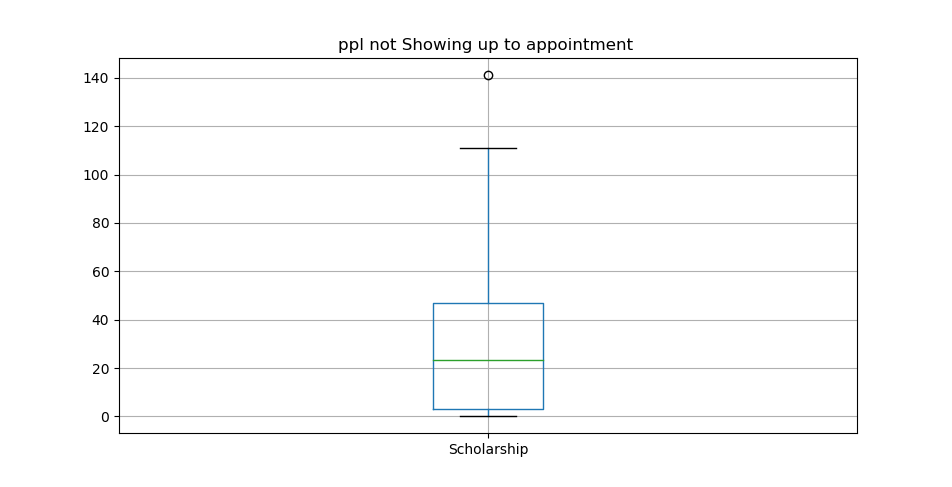

Scholarship
count     80.00000
mean      32.22500
std       34.34338
min        0.00000
25%        3.00000
50%       23.50000
75%       47.00000
max      141.00000

In [17]:
#using boxplot showing ppl didnt took appointment 
var3=var1[var1['NoShow']=='Yes']
plt.title('ppl not Showing up to appointment ')
var3.boxplot(column='Scholarship')
var3.describe()#getting the stats of ppl didnt attend appointment 

### MALE Vs FEMALE Scholarship based on Neighbourhood and its effect on NoShow Appointment
>**Parameters** 
<ol>
    <li>Neighbourhood - Independent variable</li>
    <li>Scholarship - Independent variable</li>
    <li>Gender -Independent Variable</li>
    <li>Appointment(NoShow)-dependent variable on above variables</li>

<IPython.core.display.Javascript object>


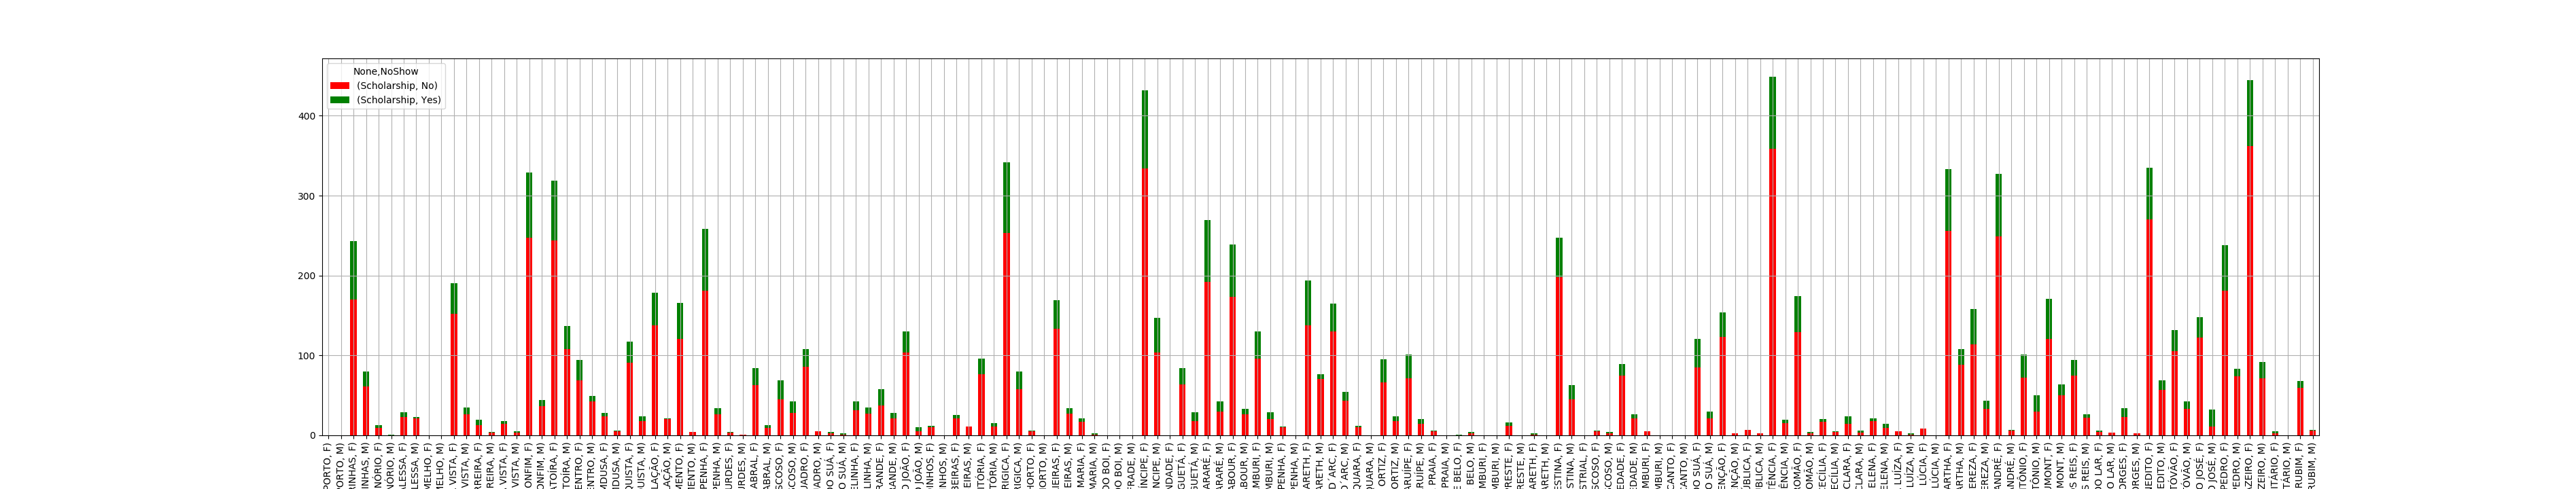

In [20]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
df_gender=df_investigate[['Gender','Scholarship','NoShow','Neighbourhood']]
#based on requirements extracting the dataframe
var_1=df_gender.groupby(['Neighbourhood','Gender','NoShow']).sum()
#grouping by gender,Neighbourhood,NoShow
var_1.unstack().plot(kind='bar',stacked=True,  color=['red','green'], grid=True)

<IPython.core.display.Javascript object>


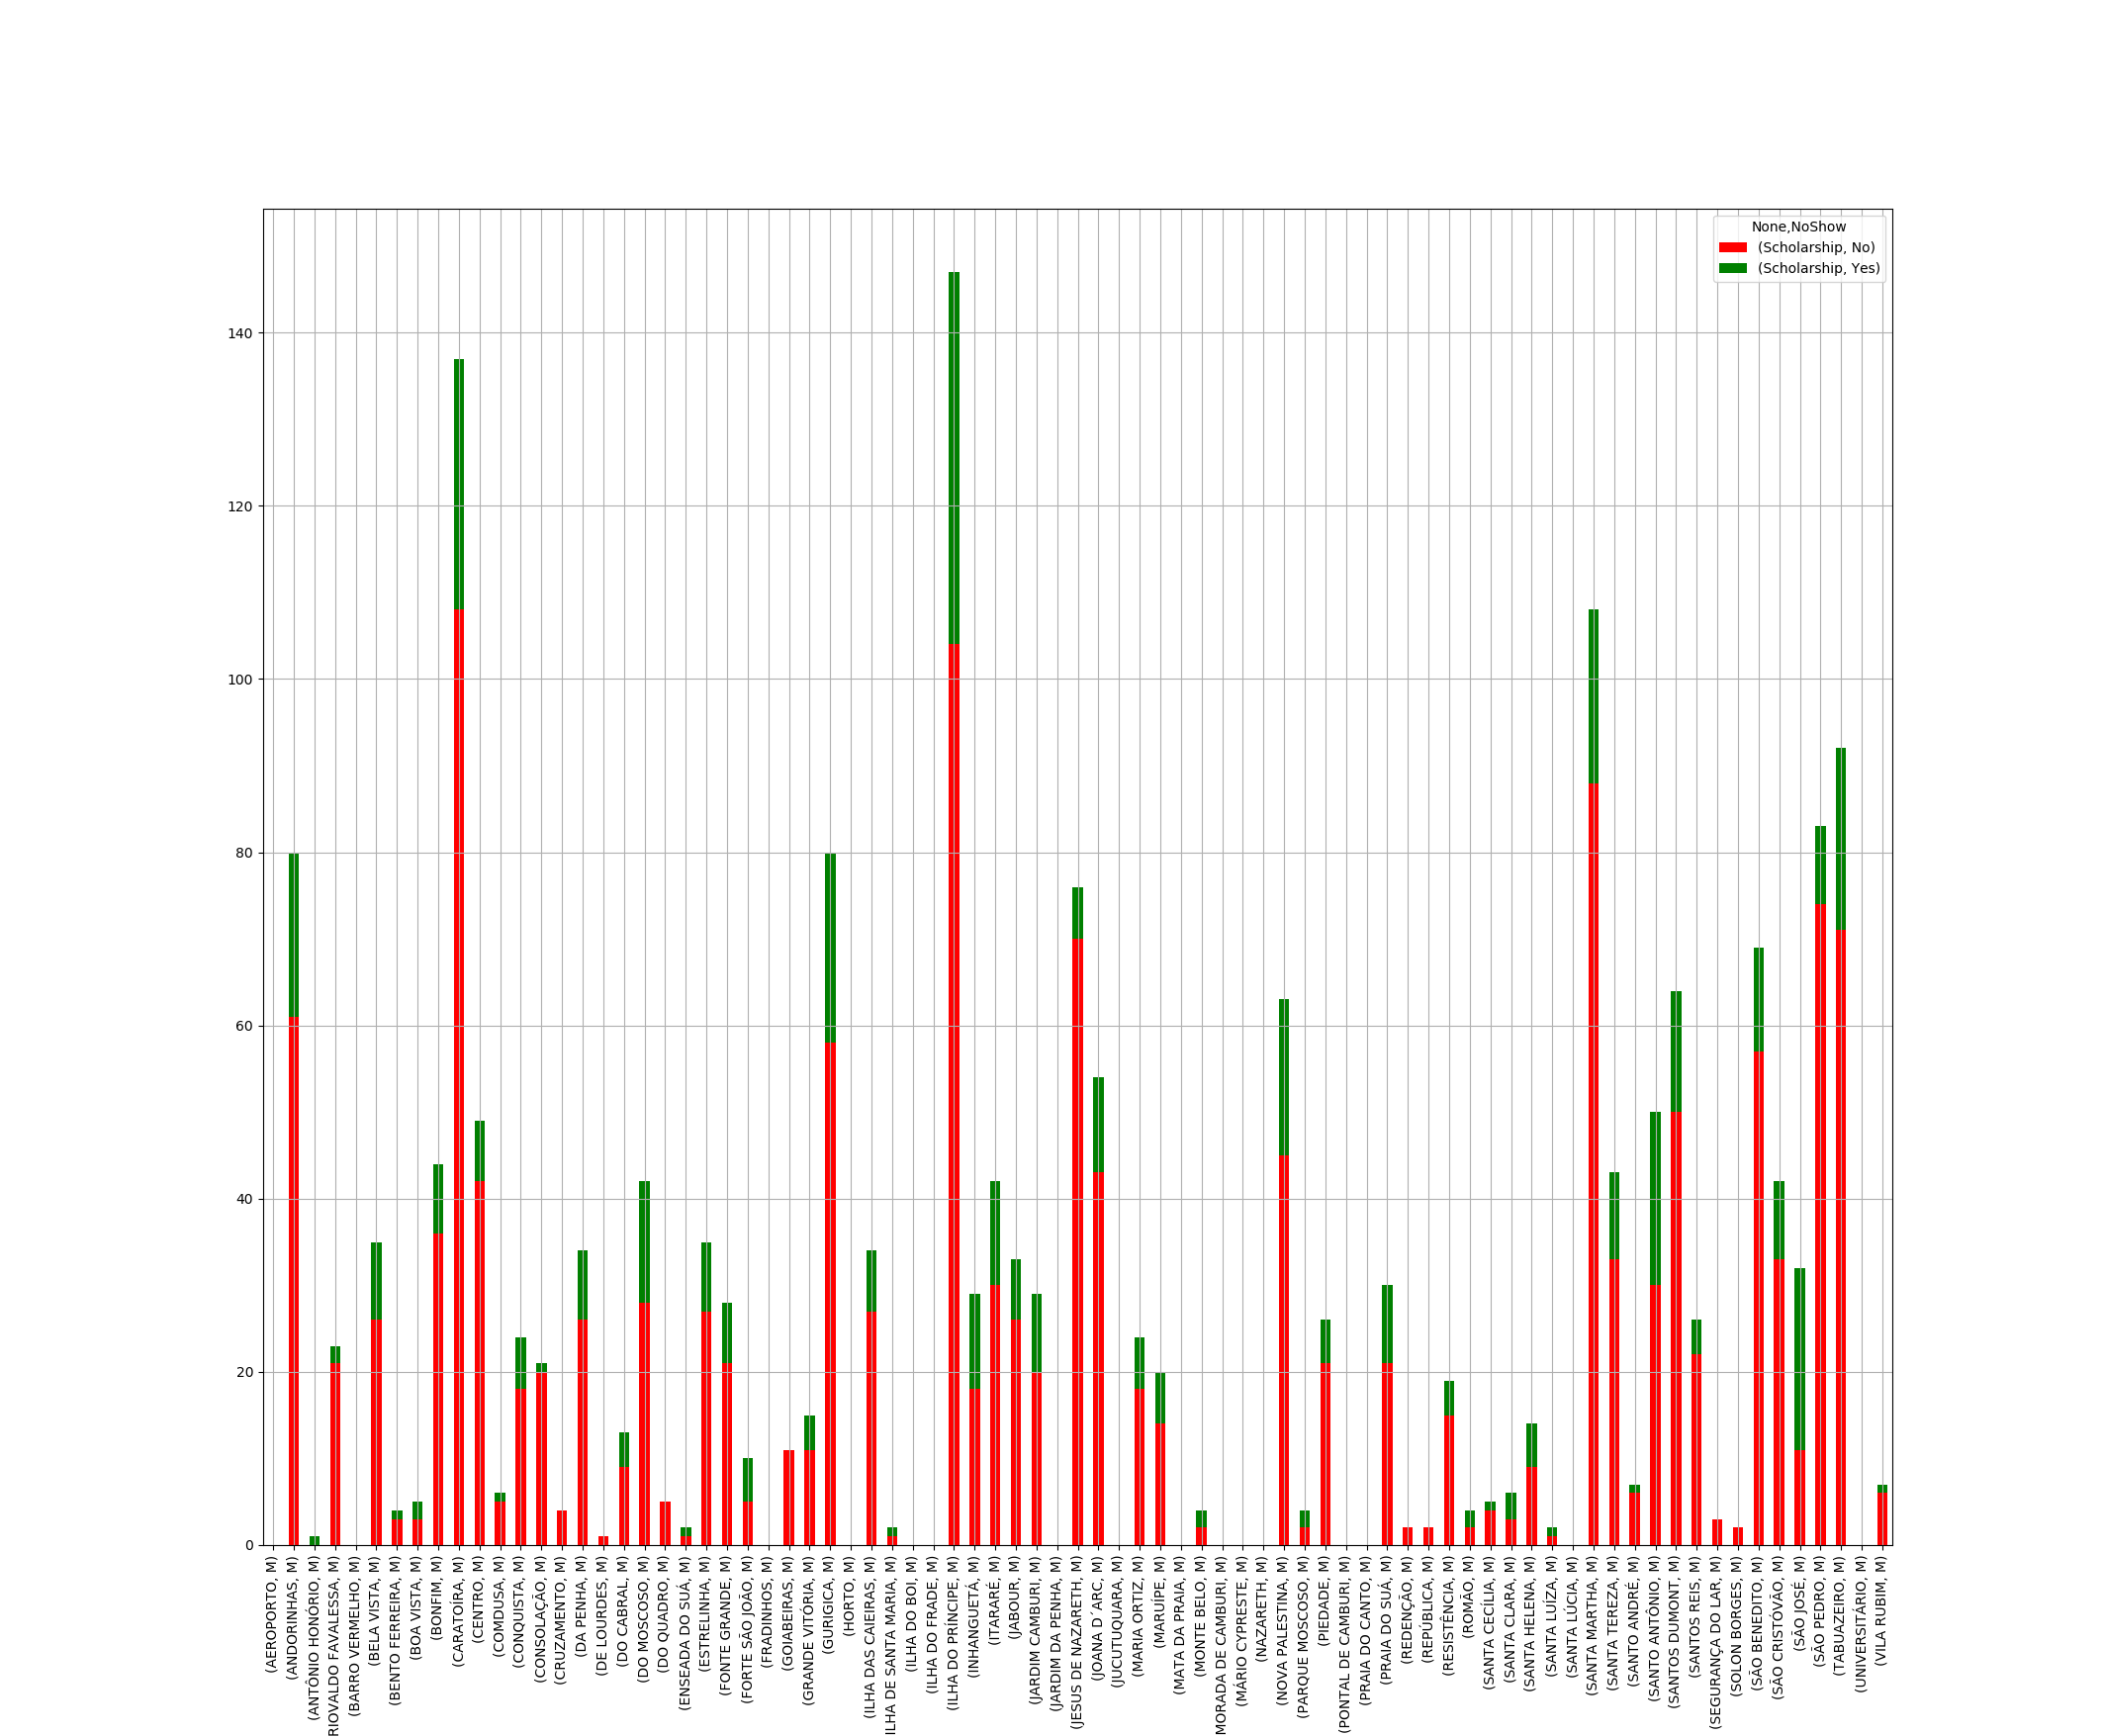

In [23]:
#male ppl grouped by Neighbourhood and NoShow
df_male=df_gender[df_gender['Gender']=='M']
df_male_plot=df_male.groupby(['Neighbourhood','Gender','NoShow']).sum()
df_male_plot.unstack().plot(kind='bar',stacked=True,  color=['red','green'], grid=True)

<IPython.core.display.Javascript object>


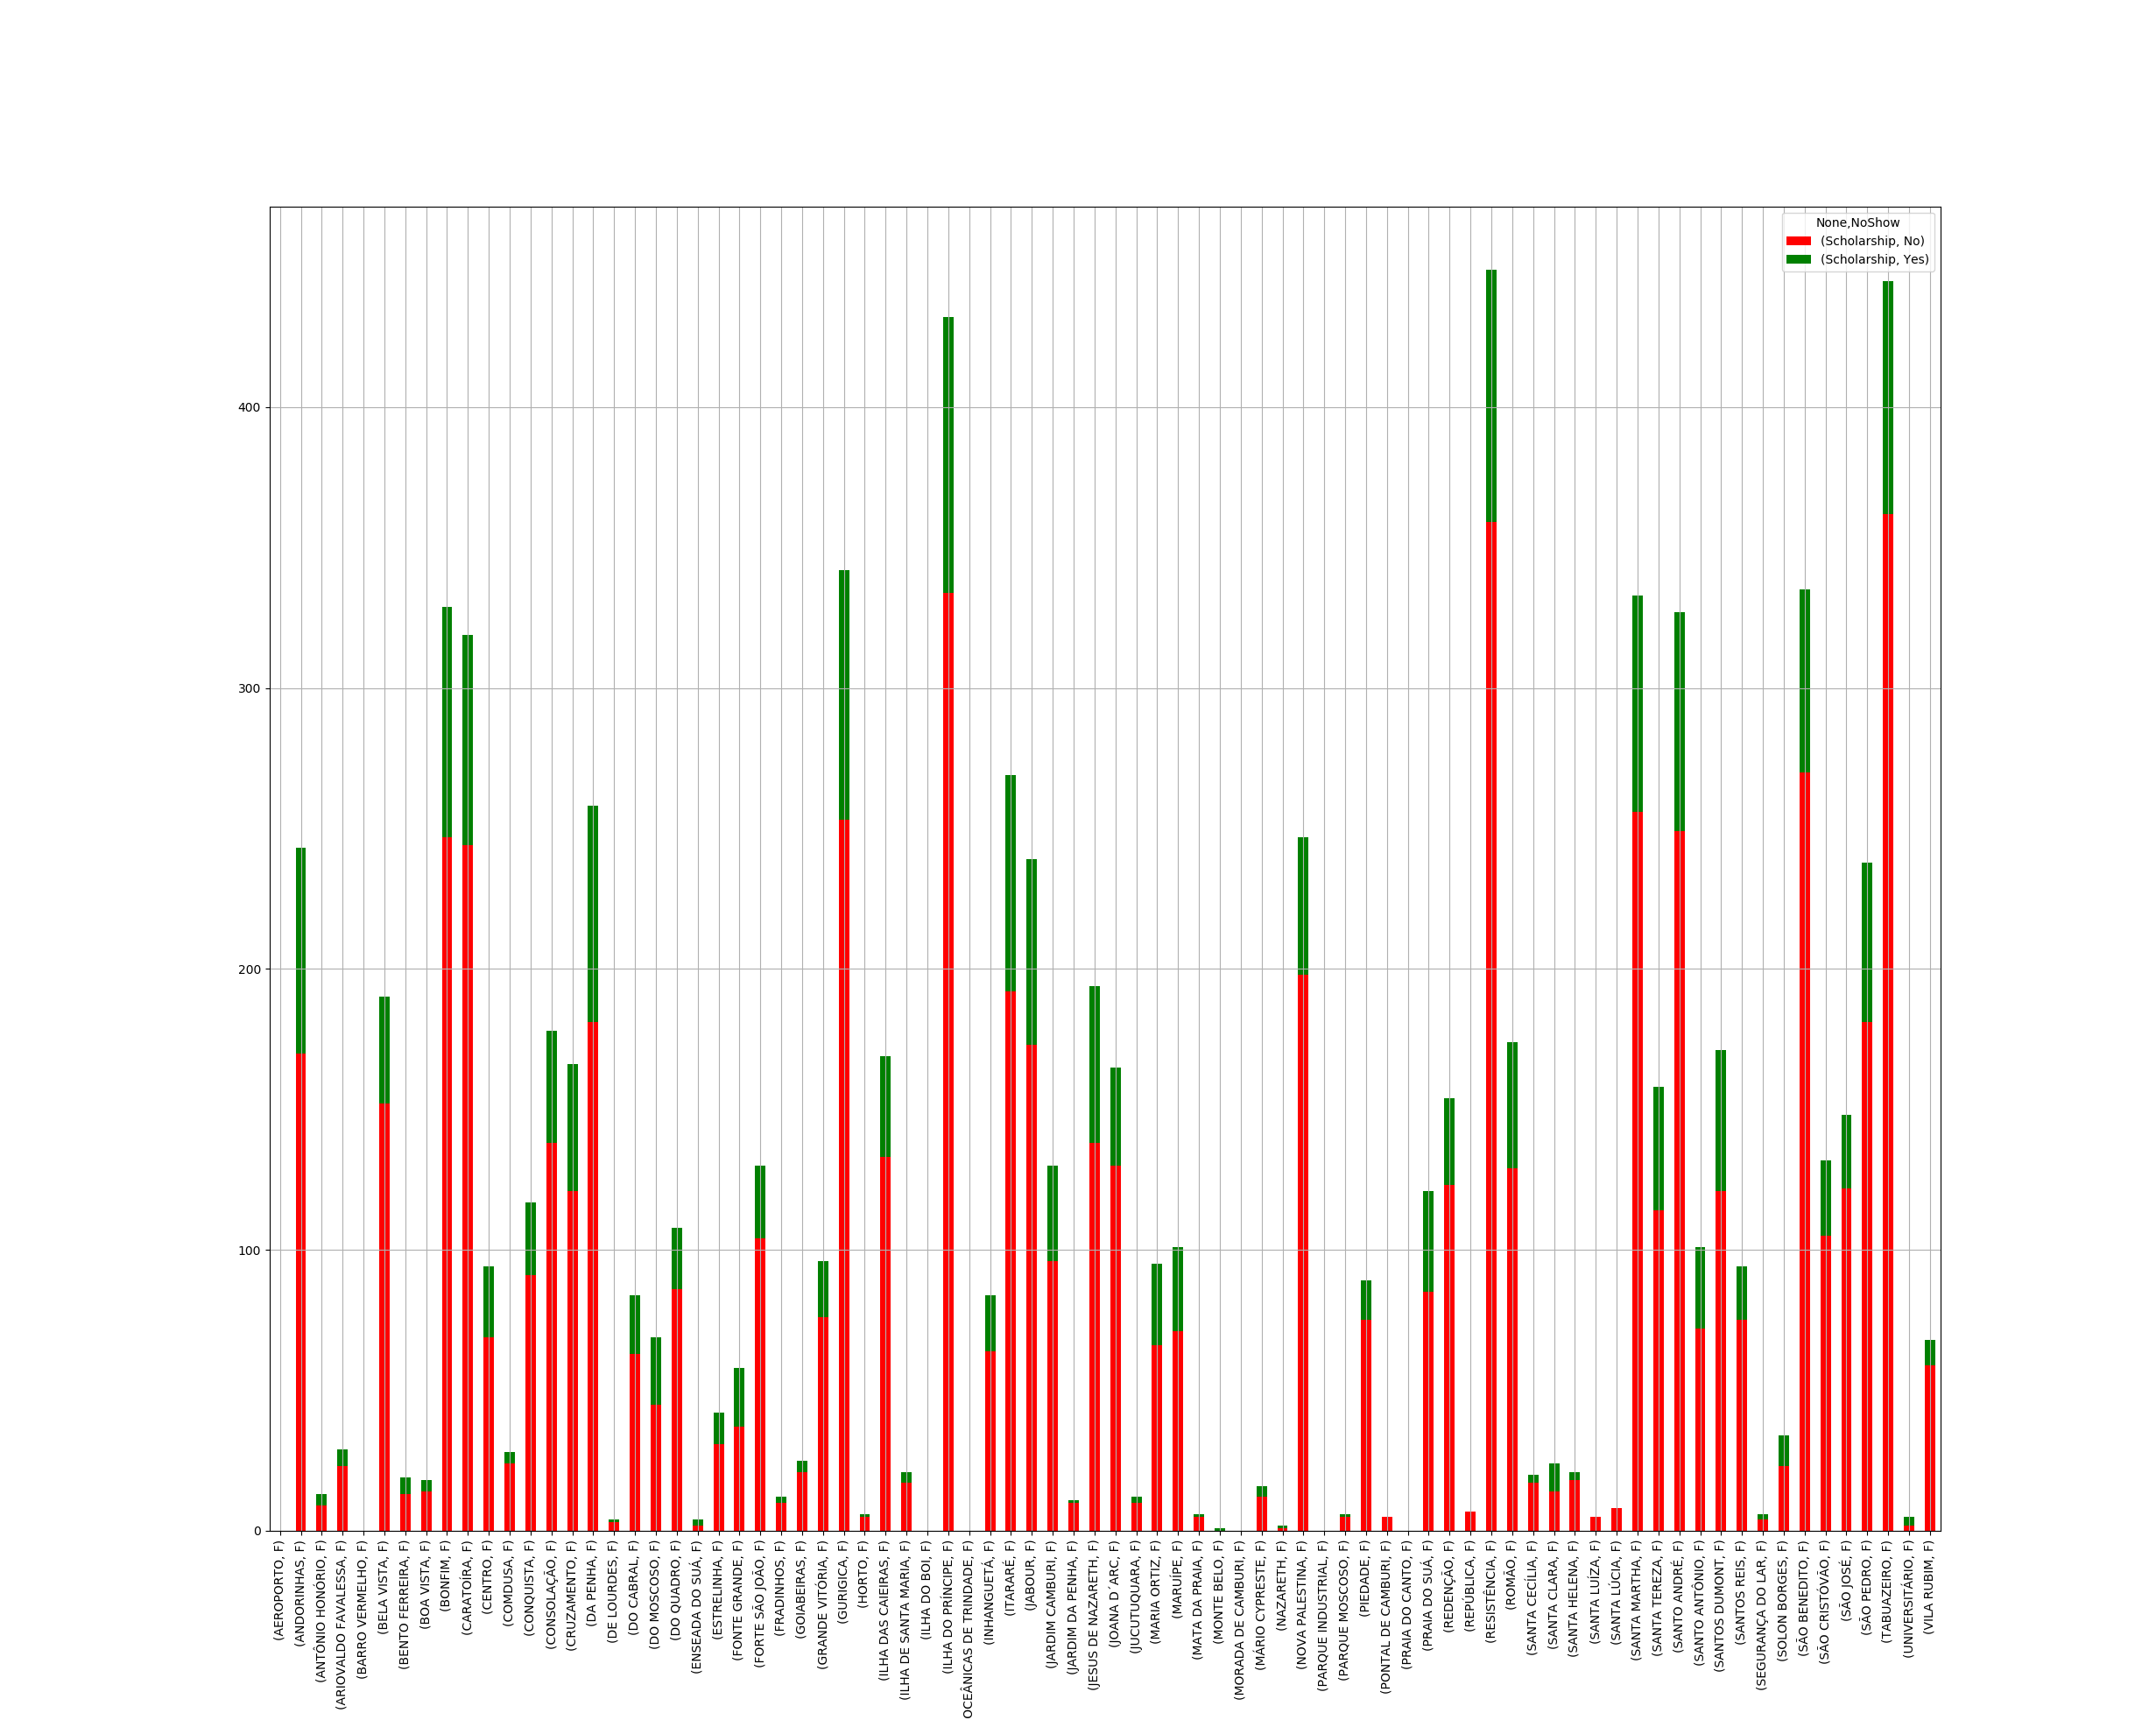

In [25]:
df_female=df_gender[df_gender['Gender']=='F']
df_female_plot=df_female.groupby(['Neighbourhood','Gender','NoShow']).sum()
df_female_plot.unstack().plot(kind='bar',stacked=True,  color=['red','green'], grid=True)

<IPython.core.display.Javascript object>


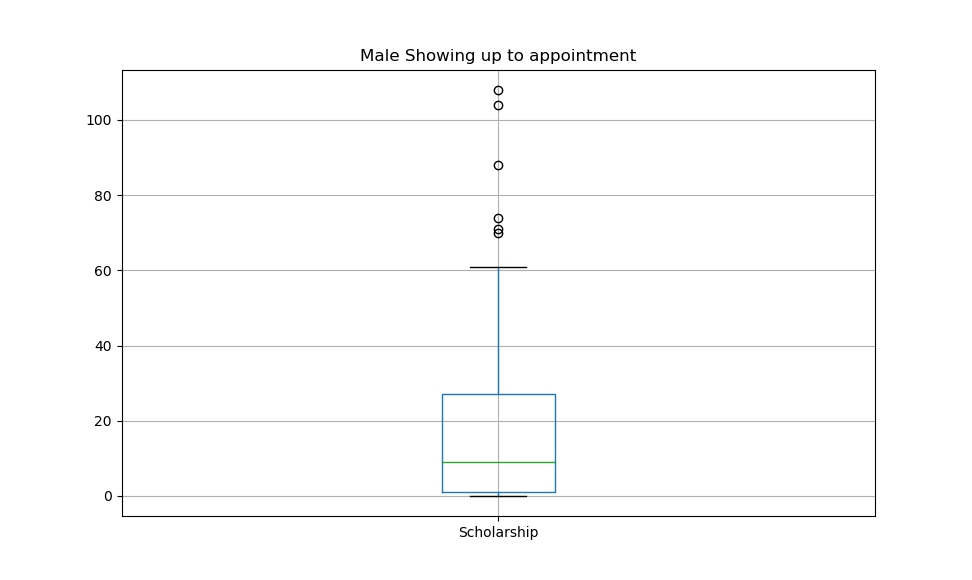

Scholarship
count    79.000000
mean     19.443038
std      25.064403
min       0.000000
25%       1.000000
50%       9.000000
75%      27.000000
max     108.000000

In [26]:
var_2=df_male.groupby(['Neighbourhood','Gender','NoShow'],as_index=False).sum()
#extracting with respect to NoShow value 'No' 
var_3=var_2[var_2['NoShow']=='No']
#based on gender value 'M' and scholarship plotting a boxplot
plt.title('Male Showing up to appointment')
var_3.boxplot(column='Scholarship')
var_3.describe()

<IPython.core.display.Javascript object>


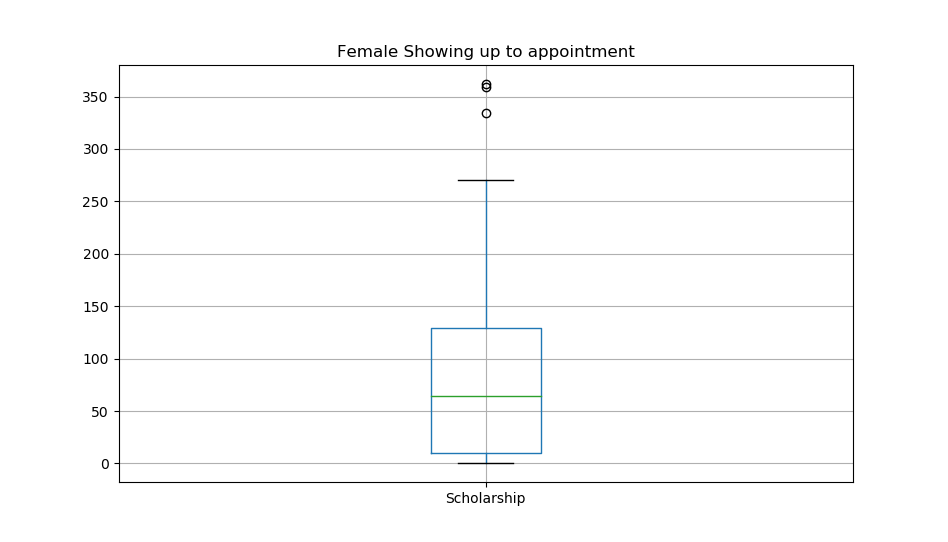

Scholarship
count    79.000000
mean     85.405063
std      93.090736
min       0.000000
25%       9.500000
50%      64.000000
75%     129.500000
max     362.000000

In [28]:
var_2F=df_female.groupby(['Neighbourhood','Gender','NoShow'],as_index=False).sum()
#extracting with respect to NoShow value 'No' 
var_3F=var_2F[var_2F['NoShow']=='No']
#based on gender value 'F' and scholarship plotting a boxplot
plt.title('Female Showing up to appointment')
var_3F.boxplot(column='Scholarship')
var_3F.describe()

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!

### Findings
>**Based on Neighbourhood and Scholarship ,how appointment is affected ? **
<ul>Observing the visuvalizations
    <li>ILHA DO PRINCIPE and TABUAZERIO are the places from which highest ppl turn up for appointment</li>
    <li>ILHA DO PRINCIPE is the place from which most ppl booked for appointment</li>
    <li>ONTAL DE CAMBURU and REPUBLICA and SANTA LUCIA are the places from which all ppl attended for appointed</li>
    </ul>
  **from boxplot**
  <ul>
    <li>Average number of ppl took appointment with respective to location and scholarship : 103</li>
    <li>Average number of ppl didnt turn up for appointment with repective to location and scholarship : 32</li>
    </ul>
  

>**MALE Vs FEMALE Scholarship based on Neighbourhood and its effect on NoShow Appointment**
><ul>Male appointment observations
    <li>ILA DO PRINCIPE is the place from which more males registered for an appointment</li>
    <li>CARATORIA is the place from which more males turn up for appointment</li>
    <li>ANTONIO HONORIO is the place from which no male turn up for appointment upon registering</li>
    </ul>
    ><ul>Female appointment observations
    <li>RESISTENICA is the place from which more female registered for appointment </li>
    <li>TABUAZERIO is the place from which more female turn up for appointment</li>
    <li>MONTE BELO is the place from which no female turn up  for appointment after registering</li>
    </ul>
    >**Boxplot observations**
    <ul>
    <li>Average number of male took appointment with respective to location and scholarship : 19</li>
    <li>Average number of female turn up for appointment with repective to location and scholarship : 85</li>
    </ul>
  

**REFERENCES**
> <li>https://www.analyticsvidhya.com/blog/2015/05/data-visualization-python/</li>
> <li>https://stackoverflow.com/questions/36367986/how-to-make-inline-plots-in-jupyter-notebook-larger</li>
> <li>https://stackoverflow.com/questions/10998621/rotate-axis-text-in-python-matplotlib</li>
